In [1]:
!pip install pycaret

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.1 MB/s e

In [2]:
from pycaret.classification import *

df = pd.read_csv("/content/train.csv")
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


# EDA

In [3]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
#Gender EDA
df['Gender'].value_counts()

Female    10422
Male      10336
Name: Gender, dtype: int64

In [5]:
df["family_history_with_overweight"].value_counts()

yes    17014
no      3744
Name: family_history_with_overweight, dtype: int64

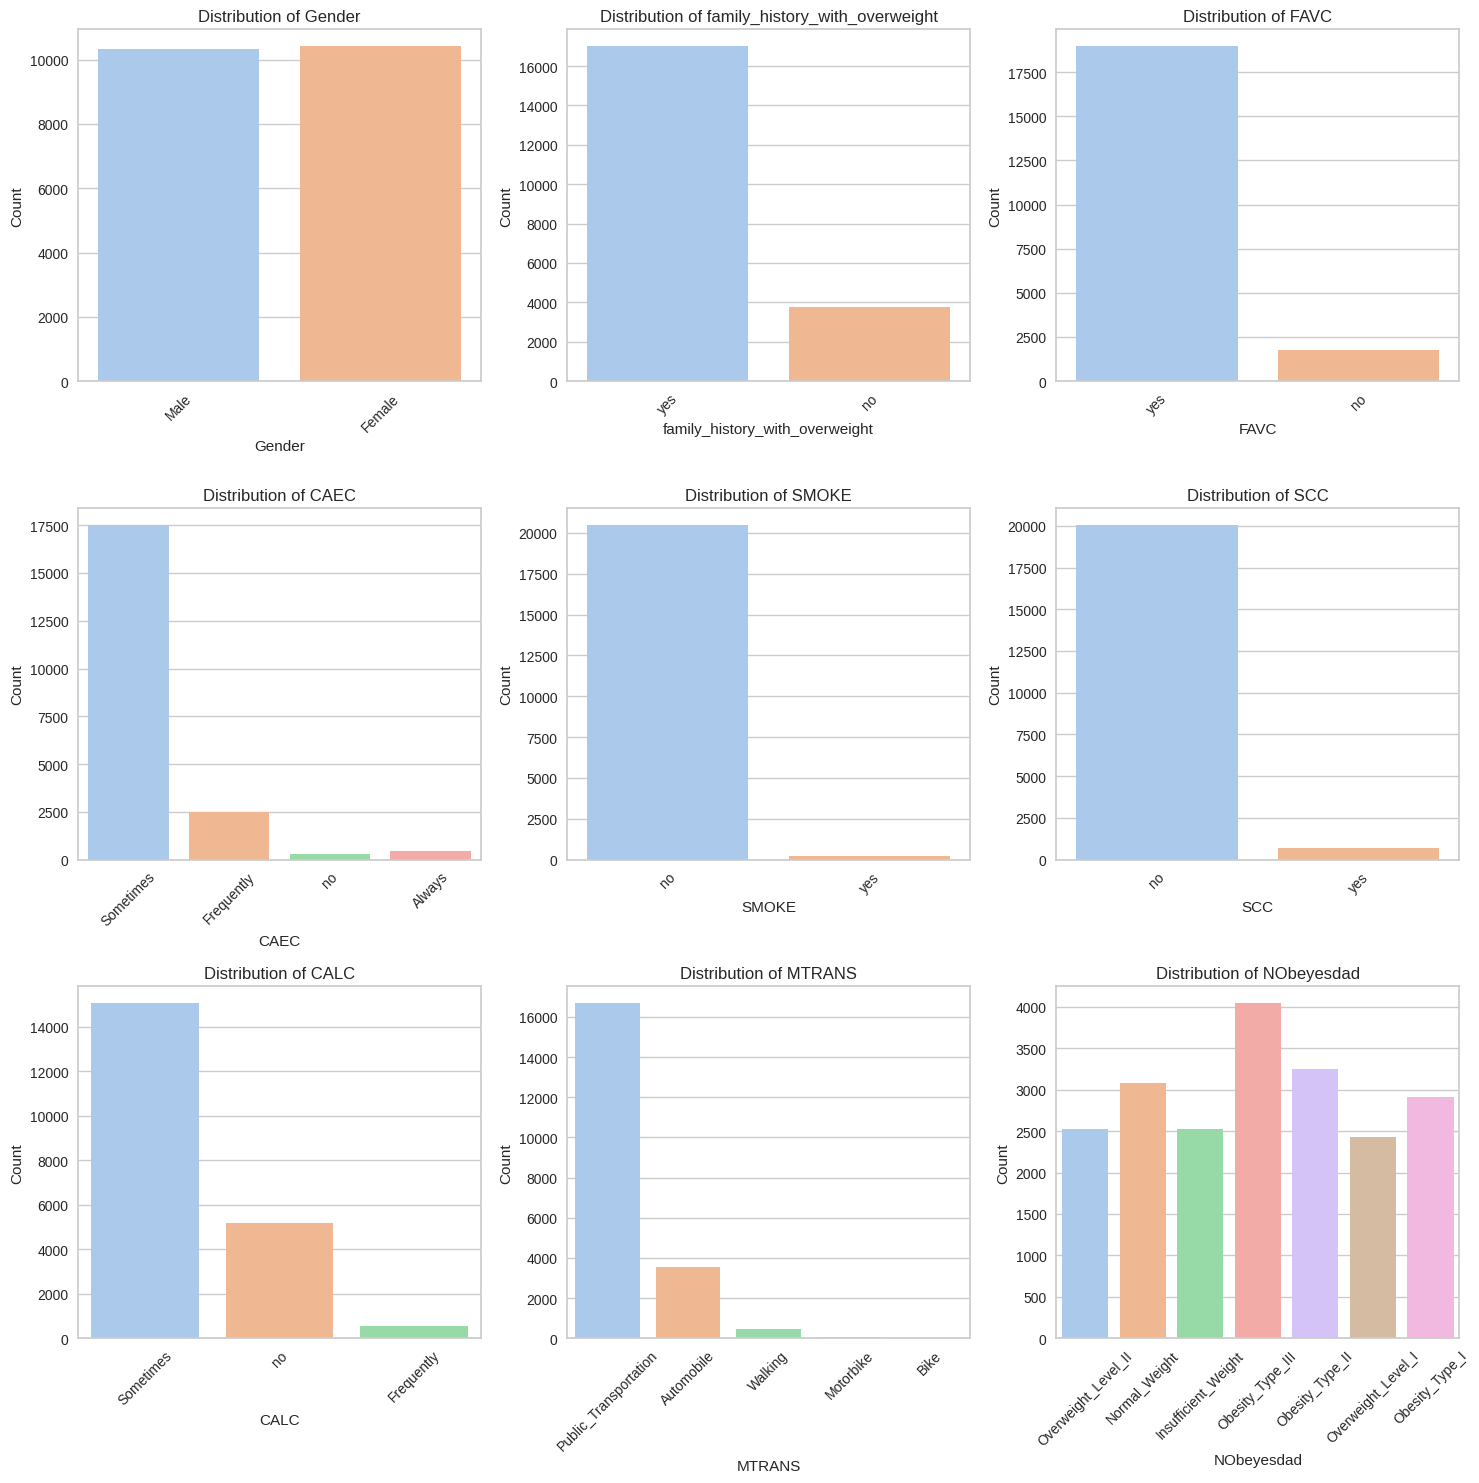

In [6]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Set up the grid layout for subplots
num_plots = len(categorical_columns)
num_cols = 3
num_rows = - (- num_plots // num_cols)  # Ceiling division

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

if num_rows == 1:
    axes = axes.reshape(1, -1)
else:
    axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, hue=col, ax=axes[i], palette='pastel', legend=False)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# PyCaret Implementation

In [8]:
clf = setup(df, target='NObeyesdad')

,Description,Value
0,Session id,6271
1,Target,NObeyesdad
2,Target type,Multiclass
3,Target mapping,"Insufficient_Weight: 0, Normal_Weight: 1, Obesity_Type_I: 2, Obesity_Type_II: 3, Obesity_Type_III: 4, Overweight_Level_I: 5, Overweight_Level_II: 6"
4,Original data shape,"(20758, 18)"
5,Transformed data shape,"(20758, 27)"
6,Transformed train set shape,"(14530, 27)"
7,Transformed test set shape,"(6228, 27)"
8,Numeric features,9
9,Categorical features,8


In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9032,0.0000,0.9032,0.9032,0.9029,0.8864,0.8865,6.3750
gbc,Gradient Boosting Classifier,0.9022,0.0000,0.9022,0.9020,0.9018,0.8853,0.8854,18.1740
xgboost,Extreme Gradient Boosting,0.9020,0.0000,0.9020,0.9019,0.9018,0.8850,0.8851,2.3880
rf,Random Forest Classifier,0.8947,0.0000,0.8947,0.8947,0.8942,0.8765,0.8766,2.3720
et,Extra Trees Classifier,0.8624,0.0000,0.8624,0.8622,0.8617,0.8386,0.8388,2.0070
dt,Decision Tree Classifier,0.8454,0.0000,0.8454,0.8461,0.8454,0.8186,0.8187,0.4020
lda,Linear Discriminant Analysis,0.8204,0.0000,0.8204,0.8187,0.8185,0.7893,0.7896,0.4160
nb,Naive Bayes,0.6798,0.0000,0.6798,0.6878,0.6645,0.6234,0.6305,0.3260
qda,Quadratic Discriminant Analysis,0.6575,0.0000,0.6575,0.6752,0.6311,0.5963,0.6108,0.3750
ridge,Ridge Classifier,0.6390,0.0000,0.6390,0.6282,0.6047,0.5743,0.5820,0.4610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [11]:
best_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 6271,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [12]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
# Create the model
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9071,0.0000,0.9071,0.9071,0.9070,0.8910,0.8911
1,0.9140,0.0000,0.9140,0.9140,0.9138,0.8991,0.8991
2,0.9064,0.0000,0.9064,0.9052,0.9055,0.8902,0.8903
3,0.8968,0.0000,0.8968,0.8957,0.8960,0.8789,0.8790
4,0.9002,0.0000,0.9002,0.9021,0.9008,0.8830,0.8831
5,0.9036,0.0000,0.9036,0.9031,0.9028,0.8869,0.8871
6,0.9043,0.0000,0.9043,0.9052,0.9044,0.8878,0.8879
7,0.9078,0.0000,0.9078,0.9085,0.9077,0.8918,0.8920
8,0.8892,0.0000,0.8892,0.8895,0.8893,0.8701,0.8701


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9050,0.0000,0.9050,0.9043,0.9046,0.8886,0.8886
1,0.9236,0.0000,0.9236,0.9233,0.9234,0.9104,0.9104
2,0.9064,0.0000,0.9064,0.9055,0.9055,0.8902,0.8903
3,0.8981,0.0000,0.8981,0.8979,0.8976,0.8805,0.8806
4,0.9078,0.0000,0.9078,0.9088,0.9082,0.8918,0.8919
5,0.9002,0.0000,0.9002,0.9001,0.8996,0.8829,0.8831
6,0.9050,0.0000,0.9050,0.9059,0.9051,0.8886,0.8887
7,0.9098,0.0000,0.9098,0.9095,0.9094,0.8942,0.8943
8,0.8940,0.0000,0.8940,0.8944,0.8939,0.8757,0.8758


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [17]:
df_test = pd.read_csv("/content/test.csv")
predictions = predict_model(tuned_model, data=df_test)
predictions.head()

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,prediction_label,prediction_score
0,20758,Male,26.899885,1.848294,120.644180,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation,Obesity_Type_II,0.9910
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I,0.9672
2,20760,Female,26.000000,1.643355,111.600555,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation,Obesity_Type_III,0.9945
3,20761,Male,20.979254,1.553127,103.669113,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation,Obesity_Type_I,0.9533
4,20762,Female,26.000000,1.627396,104.835342,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation,Obesity_Type_III,0.9911


In [20]:
submission_df = pd.DataFrame()
submission_df['id'] = predictions['id']
submission_df['NObeyesdad'] = predictions['prediction_label']

In [21]:
submission_df

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [ ]:
submission_df.to_csv('submission.csv', index=False)